In [1]:
!pip install keras_preprocessing


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 676.4 kB/s eta 0:00:00


In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [4]:
import shutil
zipfile = '/content/archive (5).zip'
unzip_to = '/content/images-trainval'
shutil.unpack_archive(zipfile, unzip_to)


In [5]:
TRAIN_DIR ='/content/images-trainval/images/images/train'
TEST_DIR = '/content/images-trainval/images/images/validation'

In [6]:
#images ko uthakr dataframe banayege ek seperate
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [7]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

sad completed
surprise completed
fear completed
neutral completed
happy completed
angry completed
disgust completed


In [8]:
print(train)


                                                   image    label
0      /content/images-trainval/images/images/train/s...      sad
1      /content/images-trainval/images/images/train/s...      sad
2      /content/images-trainval/images/images/train/s...      sad
3      /content/images-trainval/images/images/train/s...      sad
4      /content/images-trainval/images/images/train/s...      sad
...                                                  ...      ...
28816  /content/images-trainval/images/images/train/d...  disgust
28817  /content/images-trainval/images/images/train/d...  disgust
28818  /content/images-trainval/images/images/train/d...  disgust
28819  /content/images-trainval/images/images/train/d...  disgust
28820  /content/images-trainval/images/images/train/d...  disgust

[28821 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

sad completed
surprise completed
fear completed
neutral completed
happy completed
angry completed
disgust completed


In [10]:
print(test)
print(test['image'])


                                                  image    label
0     /content/images-trainval/images/images/validat...      sad
1     /content/images-trainval/images/images/validat...      sad
2     /content/images-trainval/images/images/validat...      sad
3     /content/images-trainval/images/images/validat...      sad
4     /content/images-trainval/images/images/validat...      sad
...                                                 ...      ...
7061  /content/images-trainval/images/images/validat...  disgust
7062  /content/images-trainval/images/images/validat...  disgust
7063  /content/images-trainval/images/images/validat...  disgust
7064  /content/images-trainval/images/images/validat...  disgust
7065  /content/images-trainval/images/images/validat...  disgust

[7066 rows x 2 columns]
0       /content/images-trainval/images/images/validat...
1       /content/images-trainval/images/images/validat...
2       /content/images-trainval/images/images/validat...
3       /content/imag

In [11]:
from tqdm.notebook import tqdm

In [12]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features


In [13]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [14]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [15]:
x_train = train_features/255.0
x_test = test_features/255.0

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [18]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [19]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [20]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [21]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [32]:
model.fit(x= x_train,y = y_train, batch_size = 130, epochs = 105, validation_data = (x_test,y_test))

Epoch 1/105
222/222 [==============================] - 15s 60ms/step - loss: 0.5692 - accuracy: 0.7957 - val_loss: 1.0886 - val_accuracy: 0.6459
Epoch 2/105
222/222 [==============================] - 12s 56ms/step - loss: 0.5772 - accuracy: 0.7954 - val_loss: 1.0574 - val_accuracy: 0.6383
Epoch 3/105
222/222 [==============================] - 12s 55ms/step - loss: 0.5665 - accuracy: 0.7989 - val_loss: 1.0714 - val_accuracy: 0.6320
Epoch 4/105
222/222 [==============================] - 12s 54ms/step - loss: 0.5773 - accuracy: 0.7965 - val_loss: 1.0709 - val_accuracy: 0.6387
Epoch 5/105
222/222 [==============================] - 12s 55ms/step - loss: 0.5626 - accuracy: 0.8028 - val_loss: 1.0708 - val_accuracy: 0.6431
Epoch 6/105
222/222 [==============================] - 12s 54ms/step - loss: 0.5602 - accuracy: 0.8003 - val_loss: 1.0737 - val_accuracy: 0.6384
Epoch 7/105
222/222 [==============================] - 12s 54ms/step - loss: 0.5407 - accuracy: 0.8090 - val_loss: 1.0914 - val_ac

In [33]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [34]:
from keras.models import model_from_json

In [35]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

FileNotFoundError: ignored

In [36]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [37]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [44]:
image = '/content/images-trainval/images/train/angry/10002.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of angry
1/1 [==============================] - 0s 18ms/step
model prediction is  angry


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of disgust
1/1 [==============================] - 0s 18ms/step
model prediction is  disgust


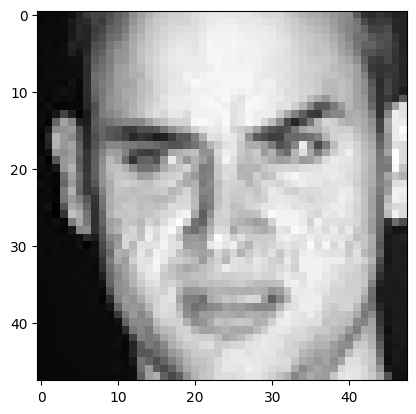

In [46]:
image = '/content/images-trainval/images/images/train/disgust/10236.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 18ms/step
model prediction is  surprise


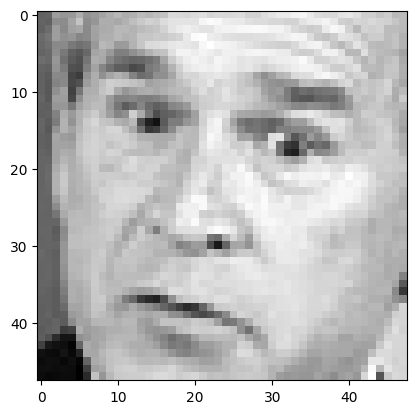

In [49]:
image = '/content/images-trainval/images/images/train/surprise/10076.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of sad
1/1 [==============================] - 0s 20ms/step
model prediction is  sad


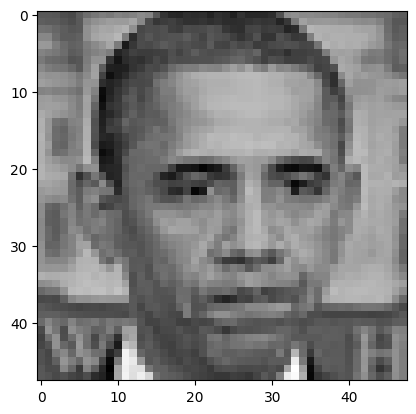

In [51]:
image = '/content/images-trainval/images/images/train/sad/10225.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')